In [14]:
import numpy as np
import gudhi as gd
import pandas as pd
from gudhi.datasets.generators import _points
from gudhi import AlphaComplex

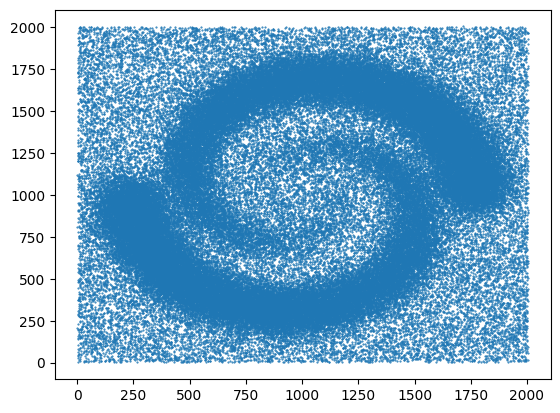

In [19]:
import gudhi as gd
f = open('/home/shaday/GIT/gudhi-data/points/spiral_2d/spiral_2d.csv', 'r')
import numpy as np
data = np.loadtxt(f)
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],marker='.',s=1)
plt.savefig('espiral.svg' , dpi=1200)
plt.show()

In [11]:
alpha_complex = AlphaComplex(points = data)
simplex_tree = alpha_complex.create_simplex_tree()

In [12]:
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)


Alpha complex is of dimension 2 - 687311 simplices - 114562 vertices.


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



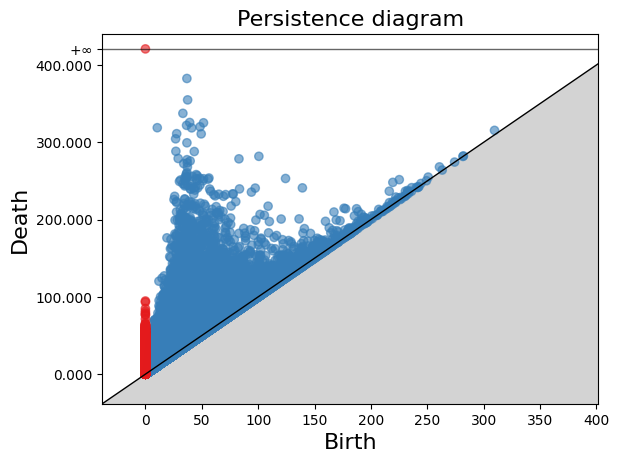

In [17]:
diag = simplex_tree.persistence()
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

gd.plot_persistence_diagram(diag)

plt.savefig('persistence_diagramSpiral.svg' , dpi=1200)
#plt.show()

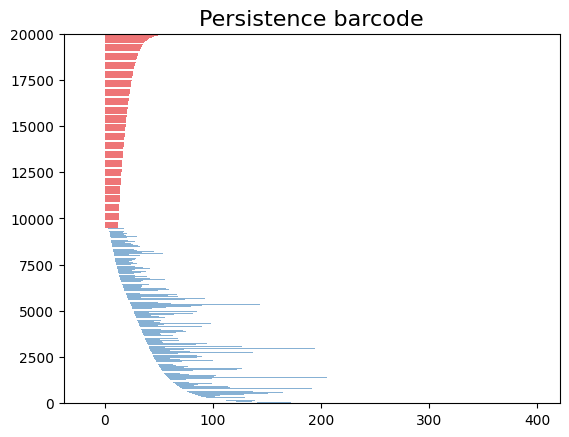

In [18]:
gd.plot_persistence_barcode(diag)
plt.savefig('persistence_barcodeSpiral.svg' , dpi=1200)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import gudhi
off_file = gudhi.__root_source_dir__ + '/data/points/tore3D_300.off'

In [4]:
print("AlphaComplex creation from points read in a OFF file")

AlphaComplex creation from points read in a OFF file


In [12]:
#!/usr/bin/env python

from gudhi.datasets.generators import _points
from gudhi import AlphaComplex


""" This file is part of the Gudhi Library - https://gudhi.inria.fr/ - which is released under MIT.
    See file LICENSE or go to https://gudhi.inria.fr/licensing/ for full license details.
    Author(s):       Hind Montassif

    Copyright (C) 2021 Inria

    Modification(s):
      - YYYY/MM Author: Description of the modification
"""

__author__ = "Hind Montassif"
__copyright__ = "Copyright (C) 2021 Inria"
__license__ = "MIT"

print("#####################################################################")
print("AlphaComplex creation from generated points on sphere")


gen_points = _points.sphere(n_samples = 50, ambient_dim = 2, radius = 1, sample = "random")

# Create an alpha complex
alpha_complex = AlphaComplex(points = gen_points)
simplex_tree = alpha_complex.create_simplex_tree()

result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)



#####################################################################
AlphaComplex creation from generated points on sphere
Alpha complex is of dimension 2 - 195 simplices - 50 vertices.


In [26]:

from gudhi.tensorflow import RipsLayer
import tensorflow as tf

X = tf.Variable([[1.,1.],[2.,2.]], dtype=tf.float32, trainable=True)
rl = RipsLayer(maximum_edge_length=2., homology_dimensions=[0])

with tf.GradientTape() as tape:
    dgm = rl.call(X)[0][0]
    loss = tf.math.reduce_sum(tf.square(.5*(dgm[:,1]-dgm[:,0])))

grads = tape.gradient(loss, [X])
print(grads[0].numpy())


[[-0.5 -0.5]
 [ 0.5  0.5]]


In [27]:
from gudhi.tensorflow import LowerStarSimplexTreeLayer
import tensorflow as tf
import gudhi as gd

st = gd.SimplexTree()
st.insert([0, 1])
st.insert([1, 2])
st.insert([2, 3])
st.insert([3, 4])
st.insert([4, 5])
st.insert([5, 6])
st.insert([6, 7])
st.insert([7, 8])
st.insert([8, 9])
st.insert([9, 10])

F = tf.Variable([6.,4.,3.,4.,5.,4.,3.,2.,3.,4.,5.], dtype=tf.float32, trainable=True)
sl = LowerStarSimplexTreeLayer(simplextree=st, homology_dimensions=[0])

with tf.GradientTape() as tape:
    dgm = sl.call(F)[0][0]
    loss = tf.math.reduce_sum(tf.square(.5*(dgm[:,1]-dgm[:,0])))

grads = tape.gradient(loss, [F])
print(grads[0].indices.numpy())
print(grads[0].values.numpy())

[2 4]
[-1.  1.]


In [28]:
from gudhi.datasets.generators import points
from gudhi import AlphaComplex

# Generate 50 points on a sphere in R^2
gen_points = points.sphere(n_samples = 50, ambient_dim = 2, radius = 1, sample = "random")

# Create an alpha complex from the generated points
alpha_complex = AlphaComplex(points = gen_points)

In [29]:
from gudhi.datasets.generators import points

# Generate 50 points randomly on a torus in R^6
gen_points = points.ctorus(n_samples = 50, dim = 3)

# Generate 27 points on a torus as a grid in R^6
gen_points = points.ctorus(n_samples = 50, dim = 3, sample = 'grid')